# Misc. Paper Plots

In [1]:
import qsttoolkit as qst
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

<Axes: title={'center': 'Density matrix for Cholesky decomposition'}, xlabel='$|n\\rangle$', ylabel='$\\langle n|$'>

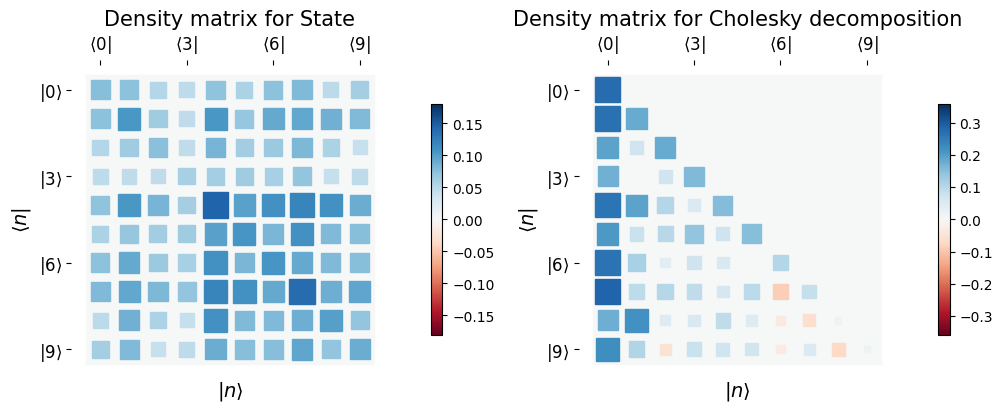

In [6]:
state = qst.random_positive_semidefinite_dm(10)
param = qst.parametrize_density_matrix(state.full())
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
qst.plot_Hinton(state, ax=axs[0], label = 'State')
qst.plot_Hinton(param, ax=axs[1], label='Cholesky decomposition')

In [4]:
Nc = 32
Nd = 32
xgrid = np.linspace(-5, 5, Nd)
pgrid = np.linspace(-5, 5, Nd)

In [7]:
fock_test = qt.fock_dm(Nc, 12)
coherent_test = qt.coherent_dm(Nc, 2.5)
thermal_test = qt.thermal_dm(Nc, 9)
num_test = qst.data.num_dm('M2', Nc)
binomial_test = qst.data.binomial_dm(Nc, 2, 2, 1)
cat_test = qst.data.cat_dm(Nc, 3)
gkp_test = qst.data.gkp_dm(Nc, [-5, 5], [-5, 5], 0.5, 4.5)
random_test = qt.rand_dm(Nc)

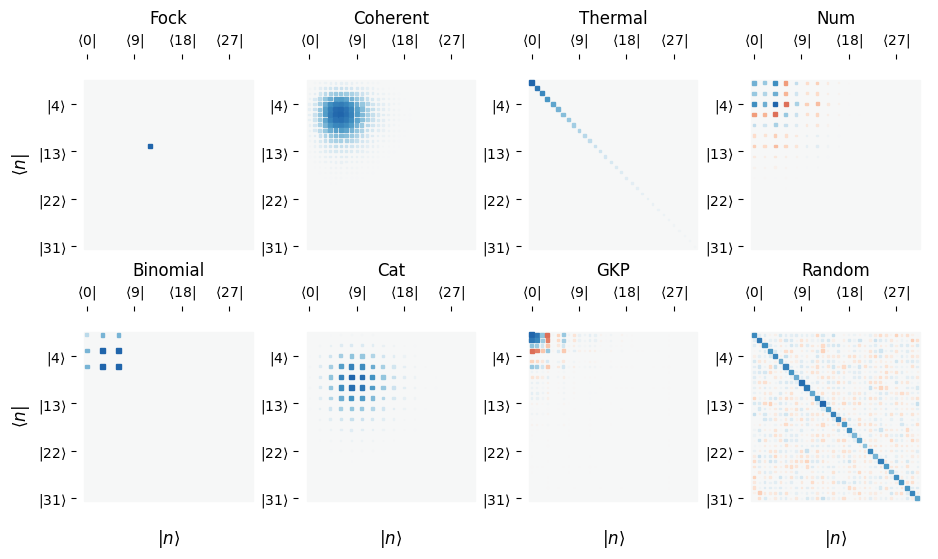

In [20]:
fig, axs = plt.subplots(2, 4, figsize=(11, 6))
qst.plot_Hinton(fock_test, ax=axs[0,0], label='fock', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(coherent_test, ax=axs[0,1], label='coherent', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(thermal_test, ax=axs[0,2], label='thermal', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(num_test, ax=axs[0,3], label='num', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(binomial_test, ax=axs[1,0], label='binomial', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(cat_test, ax=axs[1,1], label='cat', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(gkp_test, ax=axs[1,2], label='gkp', tick_fontsize=10, axes_fontsize=12, colorbar=False)
qst.plot_Hinton(random_test, ax=axs[1,3], label='random', tick_fontsize=10, axes_fontsize=12, colorbar=False)

axs[0,0].set_title("Fock", fontsize=12)
axs[0,1].set_title("Coherent", fontsize=12)
axs[0,2].set_title("Thermal", fontsize=12)
axs[0,3].set_title("Num", fontsize=12)
axs[1,0].set_title("Binomial", fontsize=12)
axs[1,1].set_title("Cat", fontsize=12)
axs[1,2].set_title("GKP", fontsize=12)
axs[1,3].set_title("Random", fontsize=12)

axs[0,0].set_xlabel("")
axs[0,1].set_xlabel("")
axs[0,2].set_xlabel("")
axs[0,3].set_xlabel("")
axs[0,1].set_ylabel("")
axs[0,2].set_ylabel("")
axs[0,3].set_ylabel("")
axs[1,1].set_ylabel("")
axs[1,2].set_ylabel("")
axs[1,3].set_ylabel("")

plt.savefig("Hintons.png", dpi=300, bbox_inches='tight')
plt.show()

In [10]:
thermal_data = qst.apply_measurement_noise(qst.gaussian_convolution(qt.qfunc(qst.mixed_state_noise(thermal_test, 0.2), xgrid, pgrid), 2), affine_theta = 20.0,
                                                                                                                                    affine_x = 0.1,
                                                                                                                                    affine_y = 0.1,
                                                                                                                                    additive_Gaussian_stddev = 0.001,
                                                                                                                                    pepper_p = 0.01,
                                                                                                                                    salt_p = 0.0)
num_data = qst.apply_measurement_noise(qst.gaussian_convolution(qt.qfunc(qst.mixed_state_noise(num_test, 0.2), xgrid, pgrid), 2), affine_theta = 20.0,
                                                                                                                                    affine_x = 0.1,
                                                                                                                                    affine_y = 0.1,
                                                                                                                                    additive_Gaussian_stddev = 0.001,
                                                                                                                                    pepper_p = 0.01,
                                                                                                                                    salt_p = 0.0)
binomial_data = qst.apply_measurement_noise(qst.gaussian_convolution(qt.qfunc(qst.mixed_state_noise(binomial_test, 0.2), xgrid, pgrid), 2), affine_theta = 20.0,
                                                                                                                                    affine_x = 0.1,
                                                                                                                                    affine_y = 0.1,
                                                                                                                                    additive_Gaussian_stddev = 0.001,
                                                                                                                                    pepper_p = 0.01,
                                                                                                                                    salt_p = 0.0)
cat_data = qst.apply_measurement_noise(qst.gaussian_convolution(qt.qfunc(qst.mixed_state_noise(cat_test, 0.2), xgrid, pgrid), 2), affine_theta = 20.0,
                                                                                                                                    affine_x = 0.1,
                                                                                                                                    affine_y = 0.1,
                                                                                                                                    additive_Gaussian_stddev = 0.001,
                                                                                                                                    pepper_p = 0.01,
                                                                                                                                    salt_p = 0.0)

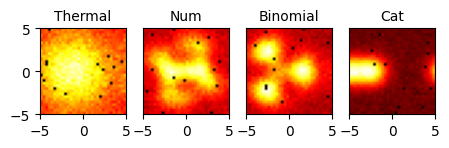

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(5.1, 2))
axs[0].imshow(thermal_data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[1].imshow(num_data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[2].imshow(binomial_data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')
axs[3].imshow(cat_data, extent=[-5, 5, -5, 5], origin='lower', cmap='hot')

axs[0].set_title("Thermal", fontsize=10)
axs[1].set_title("Num", fontsize=10)
axs[2].set_title("Binomial", fontsize=10)
axs[3].set_title("Cat", fontsize=10)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")

axs[1].set_yticks([])
axs[2].set_yticks([])
axs[3].set_yticks([])
plt.savefig("noisy_Husimi_Q.png", dpi=300, bbox_inches='tight')
plt.show()

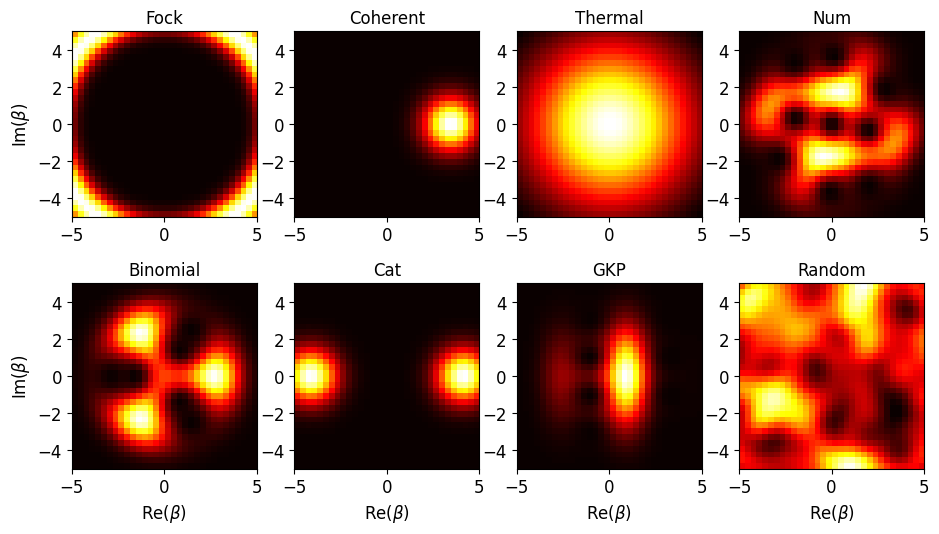

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(11, 6))
qst.plot_Husimi_Q(fock_test, xgrid, pgrid, fig=fig, ax=ax[0,0], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(coherent_test, xgrid, pgrid, fig=fig, ax=ax[0,1], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(thermal_test, xgrid, pgrid, fig=fig, ax=ax[0,2], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(num_test, xgrid, pgrid, fig=fig, ax=ax[0,3], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(binomial_test, xgrid, pgrid, fig=fig, ax=ax[1,0], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(cat_test, xgrid, pgrid, fig=fig, ax=ax[1,1], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(gkp_test, xgrid, pgrid, fig=fig, ax=ax[1,2], axes_fontsize=12, colorbar=False)
qst.plot_Husimi_Q(random_test, xgrid, pgrid, fig=fig, ax=ax[1,3], axes_fontsize=12, colorbar=False)

ax[0,0].set_title("Fock", fontsize=12)
ax[0,1].set_title("Coherent", fontsize=12)
ax[0,2].set_title("Thermal", fontsize=12)
ax[0,3].set_title("Num", fontsize=12)
ax[1,0].set_title("Binomial", fontsize=12)
ax[1,1].set_title("Cat", fontsize=12)
ax[1,2].set_title("GKP", fontsize=12)
ax[1,3].set_title("Random", fontsize=12)

ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")
ax[0,3].set_xlabel("")
ax[0,1].set_ylabel("")
ax[0,2].set_ylabel("")
ax[0,3].set_ylabel("")
ax[1,1].set_ylabel("")
ax[1,2].set_ylabel("")
ax[1,3].set_ylabel("")

plt.show()

In [ ]:
test_state = qst.data.cat_dm(32, np.pi)
noisy_state = qst.Qobj(qst.mixed_state_noise(test_state, 0.2))

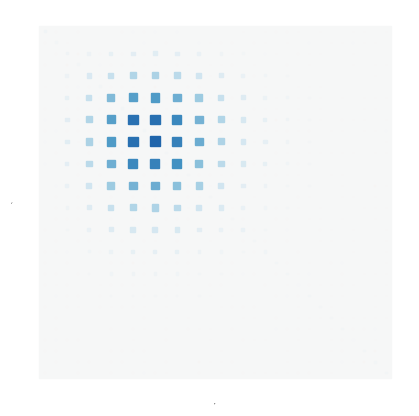

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
qst.plot_Hinton(noisy_state.full(), colorbar=False, ax=ax, tick_fontsize=0, axes_fontsize=0)
ax.set_xticks([])
ax.set_yticks([])

# Add a border (tight rectangle around the plot)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Set border color and thickness (optional)
# for spine in ax.spines.values():
#     spine.set_linewidth(2)  # Thicker border
#     spine.set_color('black')  # Black border

plt.show()

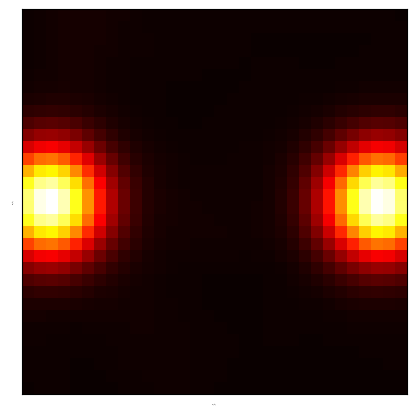

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
qst.plot_Husimi_Q(noisy_state, xgrid, pgrid, fig=fig, ax=ax, tick_fontsize=0, axes_fontsize=0, colorbar=False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

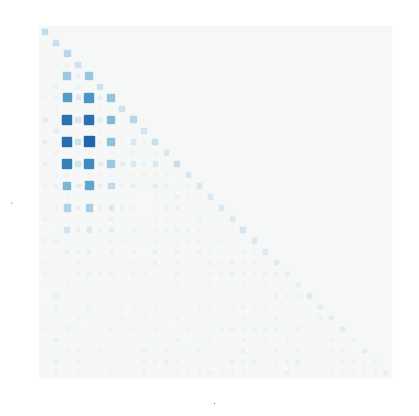

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
params = qst.parametrize_density_matrix(noisy_state.full())
qst.plot_Hinton(params, colorbar=False, ax=ax, tick_fontsize=0, axes_fontsize=0)
ax.set_xticks([])
ax.set_yticks([])
plt.show()